# Chapter 16: Transaction Costs, Turnover, and Trading

## Summary
- Transaction costs increase with trade size and the desire for quick execution.
- Transaction costs are difficult to measure accurately.  Accurate estimates can significantly affect the realized value added
- Transaction costs lower value added, however, you can often achieve 75% of value added with only half the turnover (and hence half the costs).
- Trading is a portfolio optimization problem distinct from portfolio construction problem.  Optimal trading can lower transaction costs at the expense of additional short-term risk
- There are several options for trade implementation, with rules of thumb on which to use when

Transactions ave several components:
- Commissions
- Bid-ask spread
- Market impact
- Opportunity cost



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Analyzing and Estimating Transaction Costs

- Ideally we would like to estimate transaction costs for each stock based on manager's style and possible range of trade volumes.
- Theory of market microstructure suggests that transaction costs can depend on a managers style, primarily due to differences in trading speed

_Implementation Shortfall_ approach to measuring the overall cost of trading is a powerful tool for analysing trading costs , starting with the manager's past record of transactions.

- VWAP / Volume Weighted Average Price is a simpler / cruder approach (commonly used) that misses opportunity costs entirely.
- The most difficult approach to transaction cost analysis is to directly research market tick-by tick data.  Data set is enormous, noisy and will have biases.

One approach to transaction costs models costs based on inventory risk.  The inventory risk model estimates market impact based on a liquidity supplier's risk of facilitating the trade.

This is simply

$$ \boxed{ \tau_{clear} = \frac{V_{trade}}{\overline{V}_{daily}} }$$

where $\overline{V}_{daily}$ &nbsp; is the average daily volume of the stock.

The time to clear implies an inventory risk based on the stock's volatility:

$$\boxed{ \sigma_{inventory} = \sigma \cdot \sqrt{frac{\tau_{clear}}{250}} }$$

Combining we get estimate of total cost as:

$$ \boxed{ Cost = commission + \left(\frac{bid /ask~~spread}{price}\right) + c_{tc} \cdot \frac{V_{trade}}{\overline{V}_{daily}} }$$

A trading rule of thumb is that it costs roughly one day's volatility ti trade one day's volume.  A consequence of this is that market impact should increase as the square root of the amount traded.



## Turnover, Transaction Costs, and Value Added

For any portfolio $P$, &nbsp; consider the value added

$$ \boxed{ VA_{P}= \alpha_{P} - \lambda_{A} \cdot \psi_{P}^{2} }$$

where $\psi_{P}$ &nbsp; is the portfolio's active risk relative to the benchmark $B$.

**Turnover**

Below is typical scenario of turnover required to move from portfolio $I$ to portfolio $Q$ ($TO_{Q}$).  If we restrict the turnover to be less than $TO_{Q}$, we will be giving up some value added in order to reduce cost.  The concave shape of the curve indicates a decreasing marginal return for each additional amount of turnover we allow.

**Rule of thumb**: &nbsp; You can often achieve 75% of the (incremental) value added with only half the turnover (and hence half the costs).

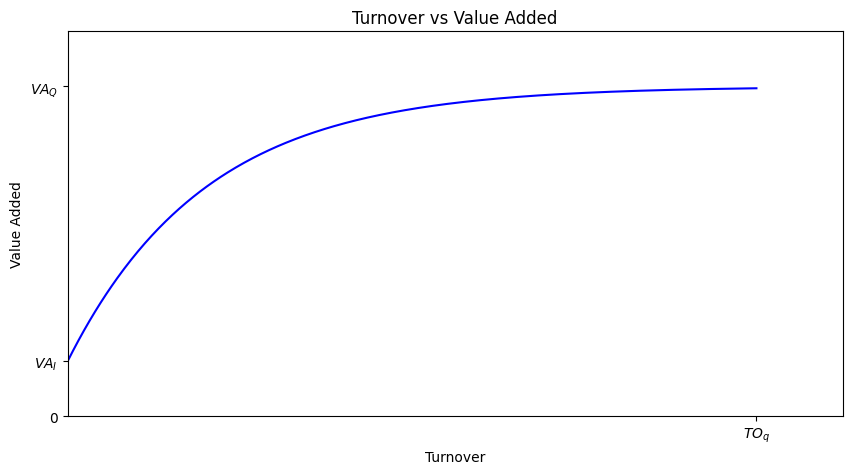

In [2]:
TO_q = 80   # Maximum turnover (TO_q)
VA_I = 10   # Value-added at the origin (VA_1)
VA_Q = 50   # Asymptotic value-added (VA_Q)

turnover = np.linspace(0, TO_q, 500)

def va_fn(t):
    return VA_I + VA_Q * (1 - np.exp(-t / (TO_q / 5)))

value_added = va_fn(turnover)

plt.figure(figsize=(10, 5))
plt.plot(turnover, value_added, label="Value Added Curve", color="blue")

plt.xlabel("Turnover")
plt.ylabel("Value Added")
plt.title("Turnover vs Value Added")
plt.ylim([0, VA_Q + 20])
plt.xlim([0, TO_q + 10])
plt.xticks([80], ['$TO_{q}$'])
plt.yticks([0, 10, 60], ['0', '$VA_{I}$', '$VA_{Q}$'])
plt.show()


**Transaction Costs**

The simplest assumption we can make about transaction costs is that round-trip costs are the same for all assets.  Let TC be the that level of costs.  We wish to choose a portfolio $P$ that will maximize:

$$ \boxed{ VA_{P} - TC \cdot TO }$$

The optimal level of turnover will occur when the marginal cost equals the marginal value added (i.e. where SLOPE(TO*) = TC)

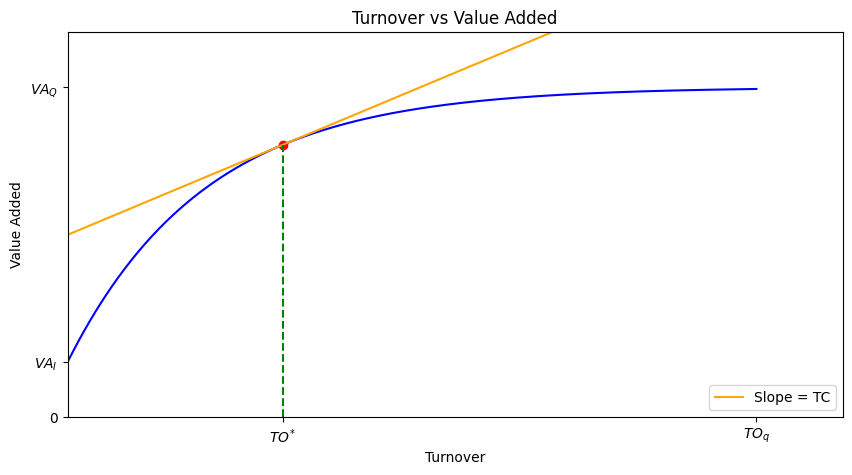

In [3]:
TC = 25

to_star = TC
va_star = va_fn(to_star)

def tangent_line(to):
    slope = (VA_Q / (TO_q / 5)) * np.exp(-to_star / (TO_q / 5))  # Derivative at TO*
    intercept = va_star - slope * to_star
    return slope * to + intercept

plt.figure(figsize=(10, 5))
plt.plot(turnover, value_added, color="blue")
plt.plot(turnover,  tangent_line(turnover), color="orange", linestyle="-", label='Slope = TC')
plt.vlines(x=to_star,ymin=0, ymax=va_star, color="green", linestyle="--")
plt.scatter([to_star], [va_star], color="red")

plt.xlabel("Turnover")
plt.ylabel("Value Added")
plt.title("Turnover vs Value Added")
plt.ylim([0, VA_Q + 20])
plt.xlim([0, TO_q + 10])
plt.xticks([to_star, 80], ['$TO^{*}$', '$TO_{q}$'])
plt.yticks([0, 10, 60], ['0', '$VA_{I}$', '$VA_{Q}$'])
plt.legend(loc='lower right')
plt.show()


## Trading as a Portfolio Optimization Problem

An example from the technical appendix.

Solving $$\boxed{ Utility = \alpha_{short} - \lambda_{S} \cdot \psi_{short}^{2} - MI }$$

Assuming the expected return is small (small number of days trading) we have two distinct cases.  When market impact dominates risk-aversion the optimal strategy is to evenly space trades over time (TWAP) even though the benchmark is immediate execution.  When risk dominates market impact the optimal schedule will close track the immediate execution benchmark. In example below within two days (40% of benchmark) the stock position is 75% of target.

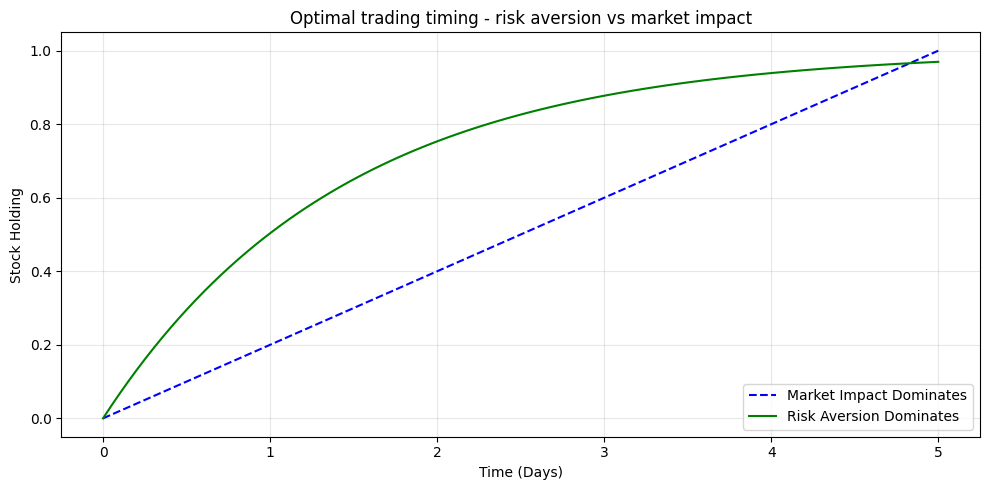

In [4]:
days = 5
time = np.linspace(0, days, 100)

# Straight line: market impact dominates
y_market_impact = time / days

# exponential curve: risk aversion dominates
y_risk_aversion_dominates = 1 - np.exp(-0.7 * time) # g = 0.7

plt.figure(figsize=(10, 5))
plt.plot(time, y_market_impact, label="Market Impact Dominates", color="blue", linestyle="--")
plt.plot(time, y_risk_aversion_dominates, label="Risk Aversion Dominates", color="green", linestyle="-")

plt.xlabel("Time (Days)")
plt.ylabel("Stock Holding")
plt.title("Optimal trading timing - risk aversion vs market impact")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()